**Library**

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,precision_score ,recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

**Directory maybe diffrent from one to another KEEP IN MIND!!!**

In [3]:
train_images,train_labels=loadlocal_mnist(images_path=r'C:\Users\wifan\ATSMachineLearning\img\emnist_source_files\emnist-mnist-train-images-idx3-ubyte',
                                            labels_path=r'C:\Users\wifan\ATSMachineLearning\img\emnist_source_files\emnist-mnist-train-labels-idx1-ubyte')

In [4]:
test_images, test_labels = loadlocal_mnist(images_path=r'C:\Users\wifan\ATSMachineLearning\img\emnist_source_files\emnist-mnist-test-images-idx3-ubyte',
                                             labels_path=r'C:\Users\wifan\ATSMachineLearning\img\emnist_source_files\emnist-mnist-test-labels-idx1-ubyte')

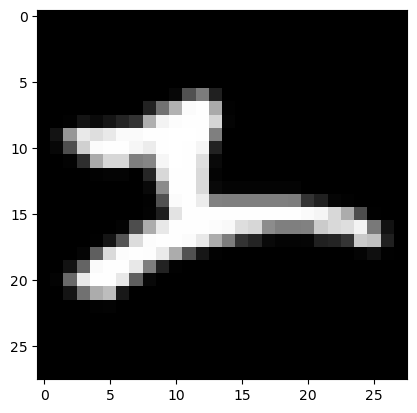

In [5]:
plt.imshow(train_images[2].reshape(28,28), cmap='gray')

In [6]:
train_labels[2]

4

**HOG**

In [8]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [9]:
feature.shape

(144,)

<BarContainer object of 144 artists>

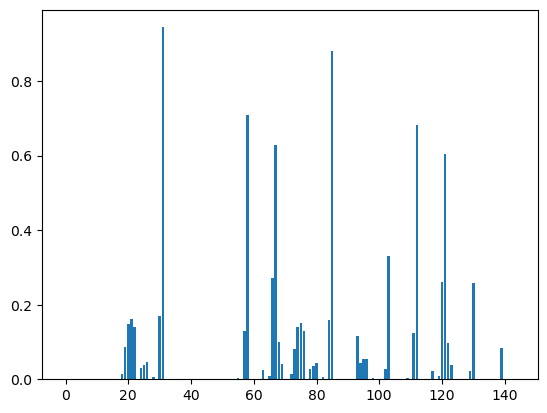

In [10]:
plt.bar(list(range(feature.shape[0])), feature)

In [11]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

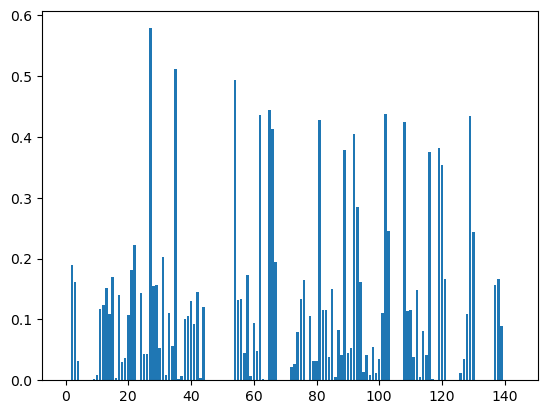

In [12]:
plt.bar(list(range(feature.shape[0])), feature)

**pakai HOG Feature Extraction**

In [14]:
n_dims = feature.shape[0]

In [15]:
n_dims

144

In [16]:
n_samples = train_images.shape[0]

In [17]:
n_samples

60000

In [18]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [19]:
X_train.shape

(60000, 144)

In [20]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [21]:
lb = LabelBinarizer()

In [22]:
lb.fit(y_train)

LabelBinarizer()

In [23]:
y_train_one_hot = lb.transform(y_train)

In [24]:
y_train_one_hot[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [25]:
y_train[0]

4

In [26]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [27]:
label[0]

4

**Klasifikasi Neural Networks**

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [30]:
clf.fit(X_train, y_train_one_hot)

E:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

**Prediksi Test Dataset**

In [32]:
n_samples = test_images.shape[0]

In [33]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [34]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [35]:
y_test_one_hot = lb.transform(y_test)

In [36]:
y_pred_one_hot = clf.predict(X_test)

In [37]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [38]:
y_pred

array([1, 8, 6, ..., 8, 9, 6])

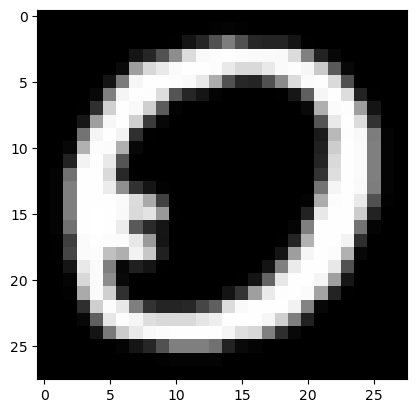

In [39]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [40]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [41]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [43]:
out[0]

0

**Evaluasi Matriks nya**

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)

In [46]:
conf_mat

array([[992,   2,   0,   2,   1,   0,   1,   1,   1,   0],
       [  9, 981,   3,   0,   3,   0,   1,   0,   3,   0],
       [ 41,   0, 940,  10,   2,   0,   0,   0,   7,   0],
       [ 18,   0,  11, 960,   0,   4,   1,   0,   3,   3],
       [ 14,   4,   3,   0, 967,   1,   1,   0,   0,  10],
       [ 16,   0,   0,   8,   1, 968,   5,   0,   0,   2],
       [  8,   0,   0,   0,   1,   1, 990,   0,   0,   0],
       [ 27,   1,   2,   1,   2,   1,   0, 960,   2,   4],
       [ 32,   6,   6,   6,   7,   3,   1,   2, 933,   4],
       [ 23,   0,   0,   3,   7,   2,   0,  10,   2, 953]], dtype=int64)

In [47]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

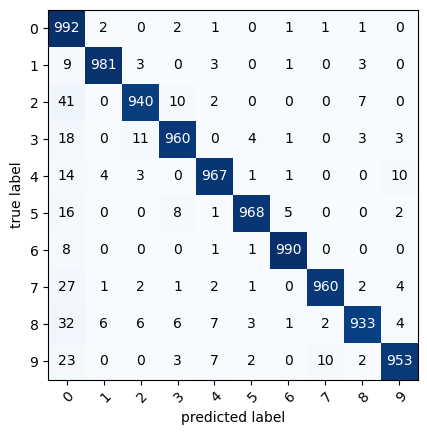

In [48]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [49]:
precision = precision_score(y_test, y_pred, average=None)
precision

array([0.84067797, 0.98692153, 0.97409326, 0.96969697, 0.97578204,
       0.9877551 , 0.99      , 0.98663926, 0.98107256, 0.97643443])

In [50]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.992, 0.981, 0.94 , 0.96 , 0.967, 0.968, 0.99 , 0.96 , 0.933,
       0.953])

In [51]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9644

In [52]:
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.964890452161308

Akhfi Wifandi_4212201031